# Superdense Coding Hands-On Notebook

This notebook demonstrates the superdense coding protocol: using one shared Bell pair to send two classical bits from Alice to Bob by transmitting only one qubit. We’ll follow these steps:

1. **Step 1**: Prepare a Bell pair between Alice (qubit `q[0]`) and Bob (qubit `q[1]`).  
2. **Step 2**: Alice encodes two classical bits $(b_0,b_1)$ by applying one of $\{I,\,X,\,Z,\,X\,Z\}$ on her qubit.  
3. **Step 3**: Alice “sends” her qubit to Bob (in simulation, it’s already on Bob’s side).  
4. **Step 4**: Bob decodes by applying CNOT and Hadamard, then measures both qubits to recover $(b_0,b_1)$.  
5. **Step 5**: Simulate and verify that Bob’s measurement outcomes match the encoded bits.

Throughout, we’ll hide solution explanations in `<details>` blocks. Make sure to run each code cell in order.

---

# Step 1: Prepare the Bell Pair

**Task**  
1. Create a 2-qubit quantum register `q` (where `q[0]` is Alice’s qubit and `q[1]` is Bob’s qubit) and a 2-bit classical register `c` to store Bob’s measurement results.  
2. Prepare the Bell state  
$$
|\Phi^+\rangle = \frac{1}{\sqrt{2}}\bigl(|00\rangle + |11\rangle\bigr)
$$  
by applying a Hadamard on `q[0]` followed by a CNOT from `q[0]` to `q[1]`.  
3. Draw the circuit to confirm the Bell-pair preparation.  


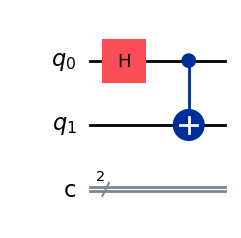

In [1]:
import qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Create registers
qreg = QuantumRegister(2, name='q')    # q[0]=Alice’s qubit, q[1]=Bob’s qubit
creg = ClassicalRegister(2, name='c')  # To store Bob’s two bits

# Build the circuit
qc = QuantumCircuit(qreg, creg)

# 1) Hadamard on Alice’s qubit (q[0])
qc.h(qreg[0])

# 2) CNOT from Alice’s qubit to Bob’s qubit (q[0] -> q[1])
qc.cx(qreg[0], qreg[1])

# Draw the Bell-pair circuit
display(qc.draw('mpl'))

<details>
<summary><b>Solution Explanation</b></summary>

- We initialize a 2-qubit register `q`.  
- Applying `qc.h(q[0])` creates $\frac{|0\rangle + |1\rangle}{\sqrt{2}}$ on Alice’s qubit.  
- The subsequent `qc.cx(q[0], q[1])` entangles Alice’s qubit with Bob’s, yielding  
  $$
  |\Phi^+\rangle 
  = \frac{1}{\sqrt{2}}\bigl(|00\rangle + |11\rangle\bigr).
  $$  
- At this point, Alice and Bob share one half of a Bell pair each, ready for encoding.  
</details>

# Step 2: Alice Encodes Two Classical Bits

**Task**  
1. Choose a two-bit string $(b_0,\,b_1)$. For demonstration, let’s set $(b_0,b_1) = (1,\,0)$.  
2. Encode these bits on Alice’s qubit `q[0]` by applying:  
   - If $(b_0,b_1) = (0,0)$, apply ?
   - If $(b_0,b_1) = (1,0)$, apply ?  
   - If $(b_0,b_1) = (0,1)$, apply ?  
   - If $(b_0,b_1) = (1,1)$, apply ?  
3. Draw the circuit to show the encoding operation.

In [ ]:
# For this run, set (b0, b1) = (1, 0)
b0, b1 = 1, 0

# Apply encoding on Alice’s qubit q[0]:
if (b0, b1) == (1, 0):
    # <---
elif (b0, b1) == (0, 1):
    # <---
elif (b0, b1) == (1, 1):
    # <---
    
# If (b0, b1) == (0, 0), do nothing

# Draw the circuit after encoding
qc.draw('mpl')

<details>
<summary><b>Solution Explanation</b></summary>

- We pick $(b_0,b_1) = (1,0)$. According to the protocol:  
  - For $(1,0)$, Alice applies an $X$ gate on her half of the Bell pair.  
- The code above checks which two-bit pattern we want to send and applies the corresponding gates on `q[0]`.  
- After this step, Alice’s qubit has been “flipped” from the Bell basis; sending it to Bob will allow him to recover $(b_0,b_1)$.  
</details>

# Step 3: “Send” Alice’s Qubit to Bob

**Task**  
1. In a physical setup, Alice would transmit qubit `q[0]` to Bob. In simulation, both qubits are already in one register, so no explicit code is needed.  
2. We simply note that from this point, Bob has both qubits.  
3. Draw the circuit again to show that no gates are applied in this “transmission” step.

In [ ]:
# No additional gates in Step 3; just display the circuit as is
qc.draw('mpl')

<details>
<summary><b>Solution Explanation</b></summary>

- Conceptually, Alice’s qubit is sent to Bob. In our simulator, both qubits reside in the same quantum register, so there is no explicit “send” operation.  
- This step is a placeholder to emphasize that Alice’s qubit is now under Bob’s control for decoding.  
</details>

# Step 4: Bob Decodes and Measures

**Task**  
1. Bob now holds both qubits (`q[0]` and `q[1]`). To decode the two classical bits, he applies:  
   - CNOT from `q[0]` (the qubit Alice sent) to `q[1]`,  
   - Hadamard on `q[0]`.  
2. Measure both qubits `q[0]` and `q[1]` into classical bits `c[0]` and `c[1]`, respectively.  
3. Draw the final decoding circuit.


In [ ]:
# 1) Bob’s decoding operations
 # < ---
 # < ---

# 2) Measure both qubits into classical register
qc.measure(qreg[0], creg[0])  # q[0] → c[0]
qc.measure(qreg[1], creg[1])  # q[1] → c[1]

# 3) Draw the full circuit including decoding
qc.draw('mpl')

<details>
<summary><b>Solution Explanation</b></summary>

- After receiving Alice’s qubit, Bob applies `qc.cx(q[0], q[1])` to “undo” the entanglement pattern.  
- Then `qc.h(q[0])` rotates into the computational basis, such that:  
  - Measuring `q[0]` → `c[0]` yields $b_0$.  
  - Measuring `q[1]` → `c[1]` yields $b_1$.  
- Thus Bob recovers the original two classical bits $(b_0,b_1)$.  
</details>


# Step 5: Simulate and Verify

**Task**  
1. Use `AerSimulator` to run the full circuit (steps 1–4) with 1024 shots.  
2. Collect counts for the two-bit string `(c[0] c[1])`.  
3. Confirm that Bob’s measurement outcomes match the encoded bits $(b_0,b_1)=(1,0)$ with high probability.  
4. (Optional) Repeat for all four possible encodings to observe the mapping.  
5. Plot the histogram of the two-bit outcomes.


In [ ]:
# Step 5: Simulate the circuit

simulator = AerSimulator()
compiled_qc = transpile(qc, simulator)

# Run with 1024 shots
job = simulator.run(compiled_qc, shots=1024)
result = job.result()
counts = result.get_counts()

# Print the raw two-bit counts
print("Counts for (c0 c1):", counts)

# Plot a histogram
plot_histogram(counts)

<details>
<summary><b>Solution Explanation</b></summary>

1. We compile and run `qc` on `AerSimulator` for 1024 shots.  
2. The dictionary `counts` maps two-bit strings (e.g. `'10'`, `'01'`, etc.) to the number of occurrences.  
3. Since $(b_0,b_1)=(1,0)$, we expect Bob’s measurement to yield `c[0]=1` and `c[1]=0` (i.e.\ the key `'10'`) almost every time (modulo shot noise).  
4. If you wish, repeat the notebook above for $(0,0)$, $(0,1)$, and $(1,1)$. In each case, you should see the single dominant count corresponding to the two classical bits Alice encoded.  
5. The histogram visually confirms Bob recovered the correct two bits.  
</details>


# (Optional) Extension: All Four Encodings

**Task**  
1. Automate the four possibilities $(b_0,b_1)\in\{(0,0),(1,0),(0,1),(1,1)\}$.  
2. For each pair, build a fresh circuit, run 512 shots, and record the measured two bits.  
3. Display the full table of results.
